# Jupyter Note book for COC131 Coursework

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import all the dependencies
import os
import sys
from coc131_cw import *

   
import numpy as np
import matplotlib.pyplot as plt

import scipy

# initialise the model
model = COC131()

## Q1 :  Load the dataset

Loaded 27000 samples, 10 unique classes.
Sample shape: (3072,)

Shape of full dataset (self.x): (27000, 3072)
Shape of labels (self.y): (27000,)
Data type of x: float64
Number of unique classes: 10

Testing return values from q1...
res1 shape (flattened image): (3072,)
res2 (label/class): Forest


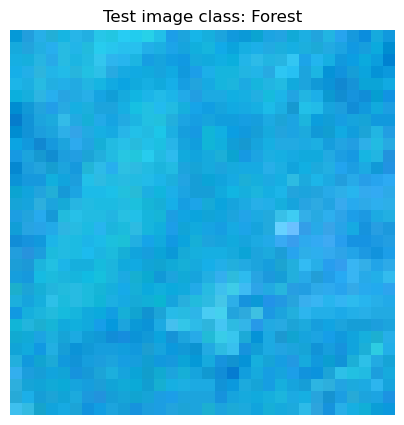

Original image range: 29.0 to 74.0
Normalized image range: 0.0 to 1.0


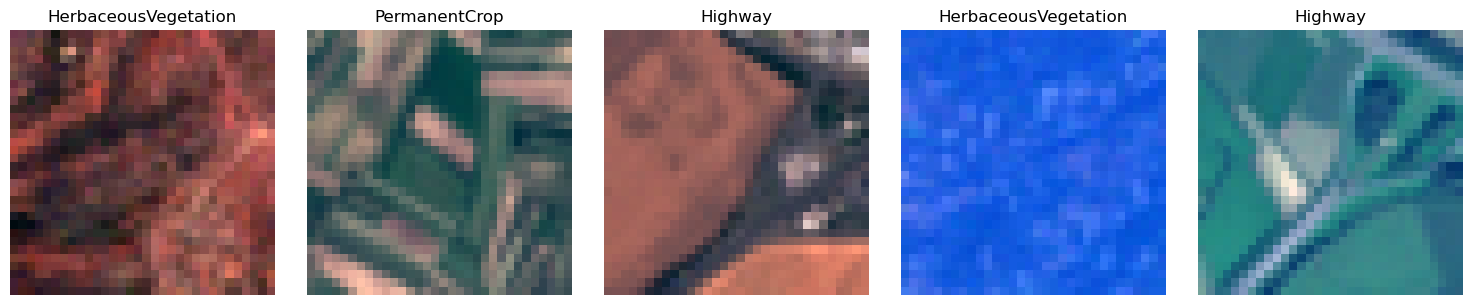


All Q1 checks passed!


In [ ]:
### 1 ###
filename = 'Forest_3.jpg'
image, label = model.q1(filename)

# TEST 1: Check instance variables
print("Shape of full dataset (self.x):", model.x.shape)
print("Shape of labels (self.y):", model.y.shape)
print("Data type of x:", model.x.dtype)
print("Number of unique classes:", len(set(model.y)))

assert isinstance(model.x, np.ndarray), "self.x should be a NumPy array"
assert isinstance(model.y, np.ndarray), "self.y should be a NumPy array"
assert model.x.ndim == 2, "self.x should be 2D (samples × features)"
assert model.y.ndim == 1, "self.y should be 1D (labels)"
assert model.x.dtype == float, "self.x must be of type float"
assert model.x.shape[0] == model.y.shape[0], "Mismatch between data and labels"


# TEST 2: Validate the returned image and label
# Only run if res1 has data
if image.size > 1:
    print("\nTesting return values from q1...")
    print("res1 shape (flattened image):", image.shape)
    print("res2 (label/class):", label)

    assert isinstance(image, np.ndarray), "image should be a NumPy array"
    assert isinstance(label, str), "label should be a string"
    assert image.ndim == 1, "image should be a 1D array (flattened image)"
    assert image.dtype == float, "image must be of type float"
    assert len(image) == 3072, "image should have 3072 values (32x32X3 image)"
    assert label in model.y, "label should be one of the known class labels"


# Only run if res1 has data
if image.size > 1:
    # Normalize image to 0-1 range for proper display
    normalized_img = (image - image.min()) / (image.max() - image.min())
    
    # Display image
    plt.figure(figsize=(5, 5))
    plt.imshow(normalized_img.reshape(32, 32, 3))
    plt.title(f"Test image class: {label}")
    plt.axis('off')
    plt.show()
    
    # Print value ranges to understand the data better
    print(f"Original image range: {image.min()} to {image.max()}")
    print(f"Normalized image range: {normalized_img.min()} to {normalized_img.max()}")

# Display 5 random images from the dataset
plt.figure(figsize=(15, 3))
random_indices = np.random.choice(range(len(model.y)), 5, replace=False)

for i, idx in enumerate(random_indices):
    # Get the flattened image and its label
    img = model.x[idx]
    img_label = model.y[idx]
    
    # Normalize image for display
    normalized_img = (img - img.min()) / (img.max() - img.min())
    
    # Create subplot
    plt.subplot(1, 5, i+1)
    plt.imshow(normalized_img.reshape(32, 32, 3))
    plt.title(f"{img_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

print("\nAll Q1 checks passed!")

## Q2 :  Standardize the dataset 

Original mean:  96.26
Original std (per feature): [50.65386646 32.99596042 27.072491   50.07821051 32.51807807]
Standardized mean:  0.00
Standardized std (per feature): [2.5 2.5 2.5 2.5 2.5]
Shape: (27000, 3072)
Q2 standardization passed.


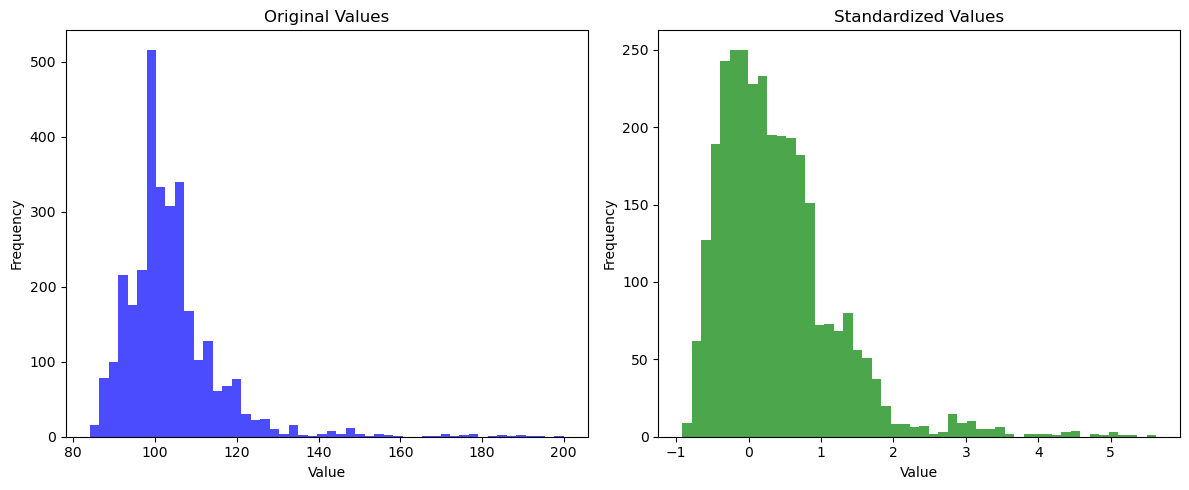

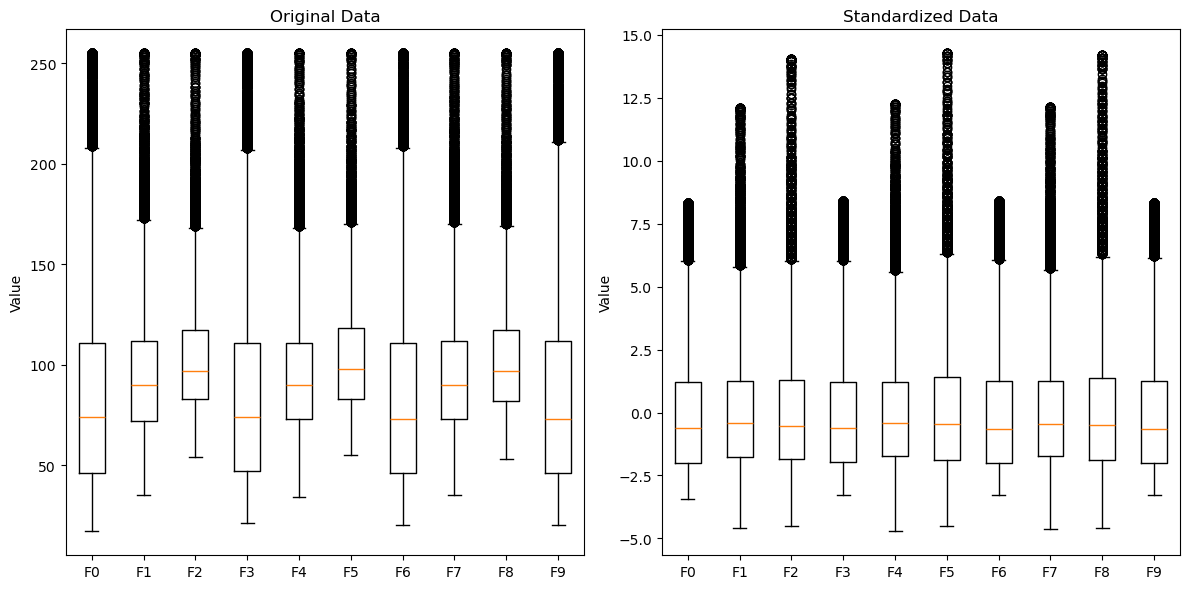

In [ ]:
### 2a ###
standardized_x, scaler  = model.q2(model.x)
print(f"Original mean: {np.mean(model.x): .2f}")
print(f"Original std (per feature): {np.std(model.x, axis=0)[:5]}")  # show first 5
print(f"Standardized mean: {np.mean(standardized_x): .2f}")
print(f"Standardized std (per feature): {np.std(standardized_x, axis=0)[:5]}")  # show first 5
print(f"Shape: {standardized_x.shape}")

# Check std ≈ 2.5
assert np.allclose(np.std(standardized_x, axis=0).mean(), 2.5, atol=0.1)
print("Q2 standardization passed.")

### Plot histograms of original and standardised data ###
plt.figure(figsize=(12, 5))

# Original data histogram
plt.subplot(1, 2, 1)
plt.hist(model.x[0], bins=50, color='blue', alpha=0.7)
plt.title("Original Values")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Standardized data histogram
plt.subplot(1, 2, 2)
plt.hist(standardized_x[0], bins=50, color='green', alpha=0.7)
plt.title("Standardized Values")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.savefig("q2-1.png")
plt.show()

### Plot boxplots for the first few features of original and standardised data ###
# Compare original vs standardized data ranges
plt.figure(figsize=(12, 6))
features_to_plot = min(10, model.x.shape[1])

# Original data boxplots
plt.subplot(1, 2, 1)
plt.boxplot(model.x[:, :features_to_plot])
plt.title("Original Data")
plt.xticks(range(1, features_to_plot+1), [f"F{i}" for i in range(features_to_plot)])
plt.ylabel("Value")

# Standardized data boxplots
plt.subplot(1, 2, 2)
plt.boxplot(standardized_x[:, :features_to_plot])
plt.title("Standardized Data")
plt.xticks(range(1, features_to_plot+1), [f"F{i}" for i in range(features_to_plot)])
plt.ylabel("Value")

plt.tight_layout()
plt.show()

### Q2b) Effect of standardization on Dataset
Using `StandardScaler` from scikit‐learn [6]

**Boxplot Graph Explaination:**
The box plot is the difference between the first 10 features in the dataset before and after standardising.

- **Boxplot of Original Feature Values**  
The original data set plot displays the features of the dataset before standardization. As you can see the data has an uneven spread across different dimensions, with some features having much larger values than others. This uneven scaling can affect training efficiency and model training, particularly for algorithms like MLPs that are sensitive to feature scaling.

- **Boxplot of Standardized Feature Values**  
This plot shows the effect of standardization with a target standard deviation of **2.5**. The data is now more evenly spread, with features scaled to have similar variances. This normalization ensures no single feature dominates due to magnitude, allowing machine learning models to train more effectively and make more balanced predictions.

**Histogram Graph Explaination:**
The histagram graph shows the spread of values for a single image in the data before and after standardisation, so it shows in general how individual images in the datasets are standardised.

- **Histogram of Original Feature Values**  
The original data showed a distribution centered around 100, with some outliers stretching beyond 180. This imbalance across features may reduce model performance as features with higher magnitude dominate the optimization process in models like neural networks.

- **Histogram of Standardized Feature Values**  
After applying standardization with a target standard deviation of **2.5**, the feature values are now centered around zero. The range of values has been rescaled, and although the shape remains skewed, the standardized feature ensures fair contribution during model training by removing magnitude bias across dimensions.


## Q3 : MLP Training + Hyperparameter Tuning

In [5]:
# define the model initial parameters
current_params = {
    'hidden_layer_sizes': (100,),  # Default
    'alpha': 0.0001, # Default
    'learning_rate_init': 0.001,  # Default
    'activation': 'relu',  # ReLU generally performs best for image data
    'solver': 'adam',  # Adam optimizer is generally more efficient for larger datasets           
}


def plot_q3_visualization(hyper_values, scores, training_values, testing_values, title, filename, 
                                xlabel="Values", ylabel="Scores", hyper_name="hyperparameter"):
    """
    Combines a bar chart and accuracy curves into one visualization.

    Parameters:
    - hyper_values: List of hyperparameter values.
    - scores: List of scores corresponding to the hyperparameter values.
    - training_values: List of lists containing training accuracy values for each hyperparameter value.
    - testing_values: List of lists containing testing accuracy values for each hyperparameter value.
    - title: Title of the visualization.
    - filename: Name of the file to save the visualization.
    - xlabel: Label for the x-axis of the bar chart (default: "Values").
    - ylabel: Label for the y-axis of the bar chart (default: "Scores").
    - hyper_name: Name of the hyperparameter being varied (e.g., "Activation Function").
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Find the index of the largest score
    max_score_idx = np.argmax(scores)

    # Bar chart for scores
    bars = axes[0].bar(hyper_values, scores, color='blue')
    bars[max_score_idx].set_color('red')  # Highlight the bar with the largest score
    axes[0].set_title(f"{title} - Scores")
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)
    axes[0].grid(axis='y')
    axes[0].tick_params(axis='x', rotation=45)

    # Add score values on top of bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width() / 2., height + 0.01,
                     f'{scores[i]:.4f}', ha='center', va='bottom')

    # Accuracy curves for training and testing
    colors = plt.cm.tab10(range(len(hyper_values)))  # Generate distinct colors
    for i, (value, color) in enumerate(zip(hyper_values, colors)):
        axes[1].plot(training_values[i], label=f'{value} - Train Acc', linestyle='--', color=color)
        axes[1].plot(testing_values[i], label=f'{value} - Test Acc', linestyle='-', color=color)

    axes[1].set_title(f"{title} - Accuracy Curves")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("Accuracy")
    axes[1].legend()
    axes[1].grid()

    plt.tight_layout()
    plt.savefig(filename)
    plt.show()


Best test accuracy: 0.5807 at epoch 9
solver: sgd, Test Score: 0.5807407407407408
Best test accuracy: 0.6000 at epoch 8
solver: adam, Test Score: 0.5997530864197531
Best solver: adam


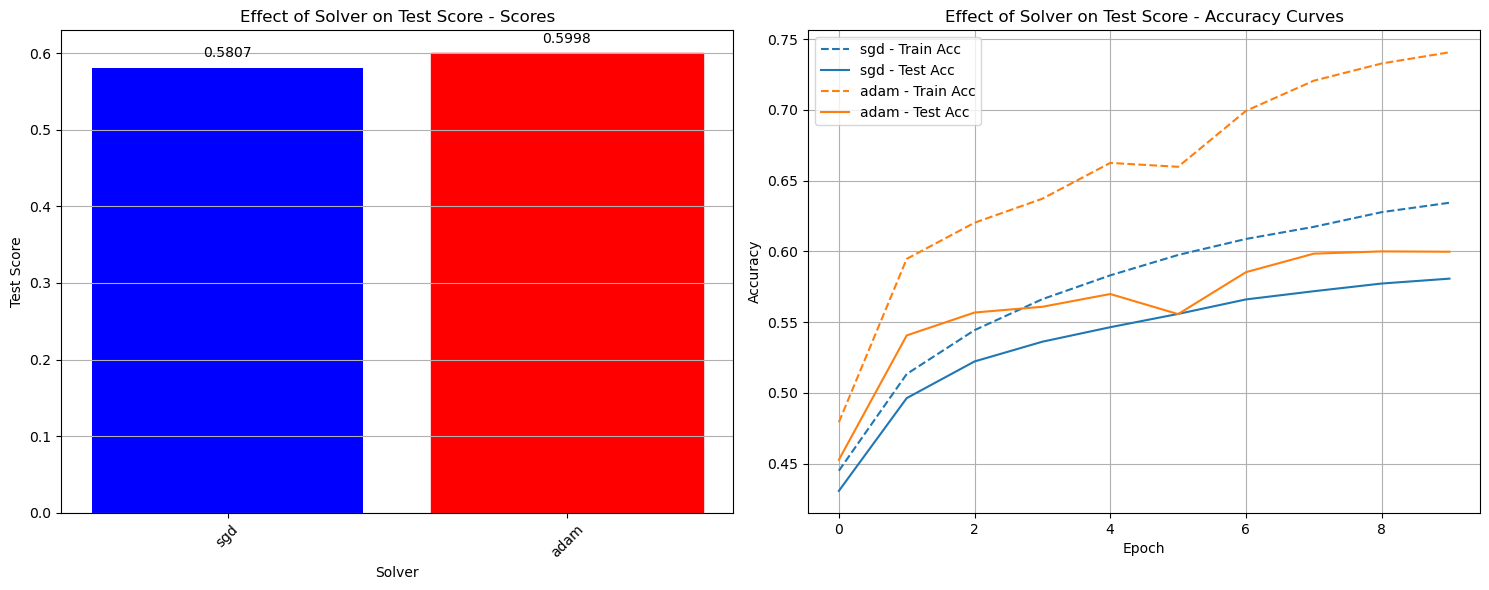

In [6]:
# hyperparameter 0: Tune solver 
solver_values = ['sgd', 'adam']
solver_scores = []

# Use the function for solver
solver_values, solver_scores, best_solver, current_params, training_values, testing_values, loss_values = model.tune_hyperparameter(solver_values, 'solver', current_params)

# Call the function to plot the bar chart and accuracy curves
plot_q3_visualization(solver_values, solver_scores, training_values, testing_values, 
                      "Effect of Solver on Test Score", 
                      "q3-solver.png", 
                      xlabel="Solver", ylabel="Test Score", hyper_name="Solver")


### `Solver` Tunning 
This section compares the performance of different solvers for training the MLPClassifier. The two solvers tested were **`sgd`** (Stochastic Gradient Descent) and **`adam`** (Adaptive Moment Estimation). By default, **`adam`** is recommended for moderately large datasets and often converges faster with higher accuracy [0]

**Test Accuracy Summary**  
The bar chart shows that **`adam`** achieved a higher test accuracy (**~0.5998**) compared to `sgd` (**~0.5807**). This suggests that Adam's adaptive learning rate and momentum features lead to more effective optimization in this case.

**Learning Curves**  
The line plot shows training and testing accuracy over 10 epochs. `adam` shows faster convergence and better generalization. `sgd` improves steadily but at a slower rate and reaches a lower final performance. This difference highlights the benefit of adaptive solvers in deep learning.

**Conclusion**  
**Adam** was selected as the final solver due to its higher performance and faster convergence rate. Its robustness makes it more suitable for training deeper neural networks on this image dataset. matching it with **SGD** would require tuning `learning_rate_init` or `momentum`[3].

Best test accuracy: 0.4205 at epoch 8
activation: identity, Test Score: 0.40839506172839507
Best test accuracy: 0.5796 at epoch 9
activation: logistic, Test Score: 0.5796296296296296
Best test accuracy: 0.5607 at epoch 6
activation: tanh, Test Score: 0.5595061728395062
Best test accuracy: 0.6000 at epoch 8
activation: relu, Test Score: 0.5997530864197531
Best activation: relu


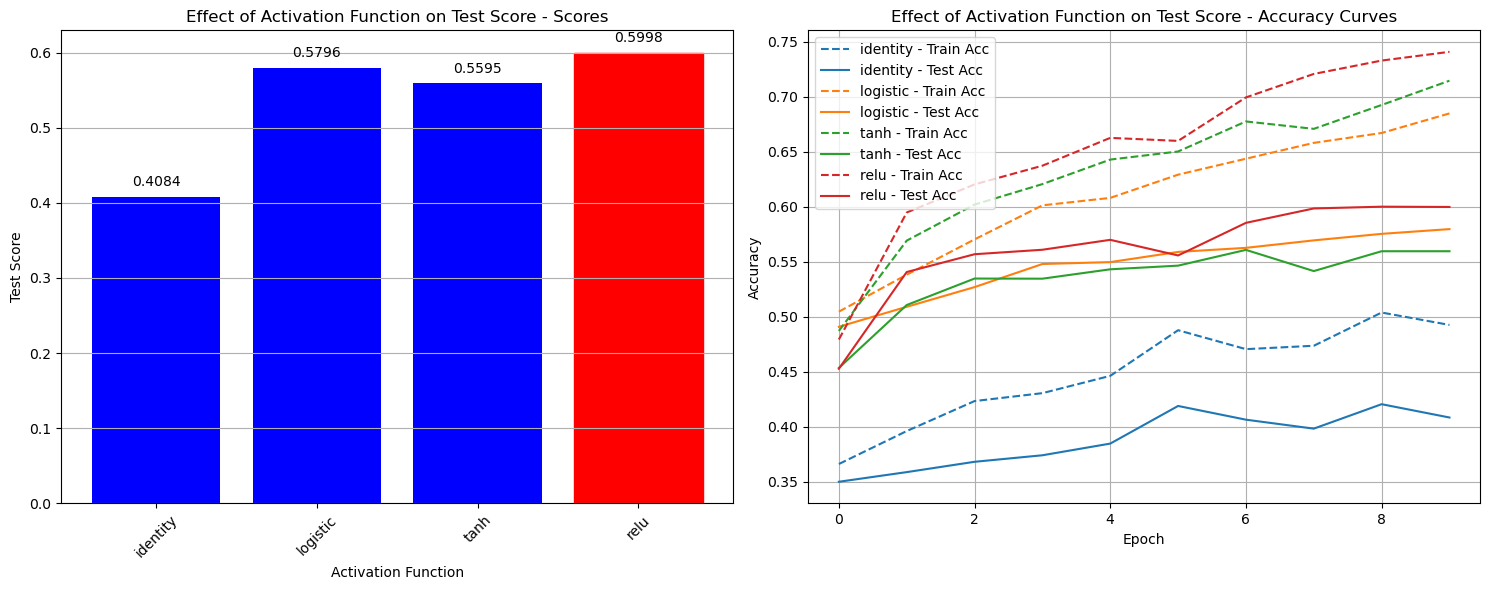

In [7]:
# hyperparameters 1: Tune activation function (using best solver)
activation_values = ['identity', 'logistic', 'tanh', 'relu']
activation_scores = []

# Use the function for activation
activation_values, activation_scores, best_activation, current_params, training_values, testing_values, loss_values = model.tune_hyperparameter(activation_values, 'activation', current_params)

# Call the function to plot the bar chart and accuracy curves
plot_q3_visualization(activation_values, activation_scores, training_values, testing_values, 
                      "Effect of Activation Function on Test Score", 
                      "q3-activation.png", 
                      xlabel="Activation Function", ylabel="Test Score", hyper_name="Activation Function")


### `Activtion Function` Tunning 
his section explores the impact of activation functions on model performance using the optimal hidden layer setup `(300, 150)`. Four functions were tested: 
- **`identity`** (no-op, \(f(x)=x\))  
- **`logistic`** (sigmoid, \(1/(1+e^{-x})\))  
- **`tanh`** (hyperbolic tangent)  
- **`relu`** (rectified linear unit, \(\max(0,x)\)) [0]

**Test Accuracy Summary**  
The bar chart shows that **ReLU** achieved the highest test accuracy (**~0.5998**), followed by `logistic` and `tanh`. `Identity` performed the worst, as expected due to its lack of non-linearity.

**Learning Curves**  
The line plot compares training and testing accuracy across 10 epochs. `ReLU` shows rapid and consistent improvement on both sets, indicating good learning and generalization. `Tanh` and `logistic` also improve steadily but perform slightly worse. `Identity` remains low throughout, confirming poor learning.

**Conclusion**  
`ReLU` outperformed other activation functions in both convergence speed and final accuracy. Its ability to model non-linear patterns efficiently makes it the best choice for this dataset and was used in further model tuning.

Best test accuracy: 0.6000 at epoch 8
hidden_layer_sizes: (100,), Test Score: 0.5997530864197531
Best test accuracy: 0.6070 at epoch 9
hidden_layer_sizes: (200,), Test Score: 0.607037037037037
Best test accuracy: 0.6110 at epoch 9
hidden_layer_sizes: (400,), Test Score: 0.6109876543209877
Best test accuracy: 0.5830 at epoch 7
hidden_layer_sizes: (64,), Test Score: 0.5737037037037037
Best test accuracy: 0.5962 at epoch 8
hidden_layer_sizes: (128, 64), Test Score: 0.5706172839506173
Best test accuracy: 0.6093 at epoch 8
hidden_layer_sizes: (256, 128), Test Score: 0.6035802469135803
Best test accuracy: 0.6193 at epoch 7
hidden_layer_sizes: (512, 256), Test Score: 0.5864197530864198
Best test accuracy: 0.6060 at epoch 9
hidden_layer_sizes: (100, 50), Test Score: 0.6060493827160494
Best test accuracy: 0.6140 at epoch 8
hidden_layer_sizes: (200, 100), Test Score: 0.6092592592592593
Best test accuracy: 0.6154 at epoch 6
hidden_layer_sizes: (300, 150), Test Score: 0.6132098765432099
Best test 

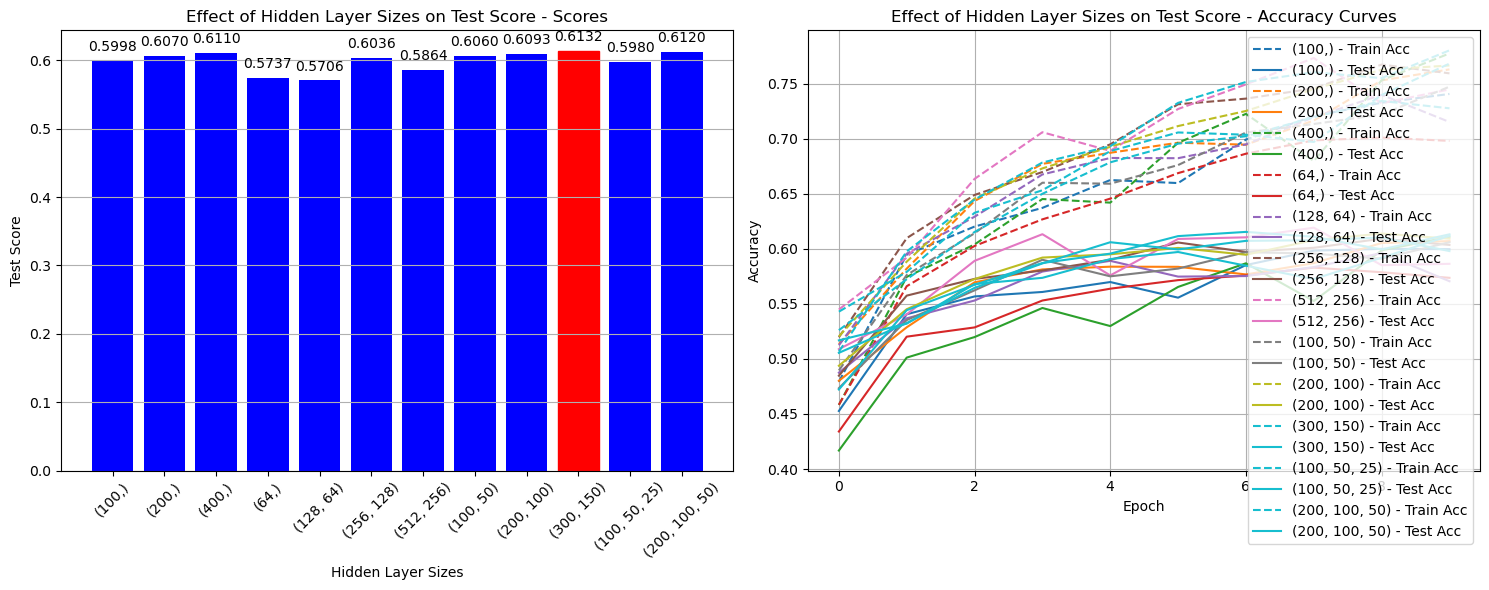

In [8]:
# hyperparamter 2: Tune hidden_layer_sizes (using best activation function)
hls_values = [(100,), (200,), (400,), (64,), (128, 64), (256, 128), (512, 256), (100, 50), (200, 100), (300, 150), (100, 50, 25), (200, 100, 50)]
hls_scores = []


# Use the function for hidden_layer_sizes
hls_values, hls_scores, best_hls, current_params, training_values, testing_values, loss_values = model.tune_hyperparameter(hls_values, 'hidden_layer_sizes', current_params)

# Call the function to plot the bar chart and accuracy curves
plot_q3_visualization([str(hls) for hls in hls_values], hls_scores, training_values, testing_values, 
                      "Effect of Hidden Layer Sizes on Test Score", 
                      "q3-hls.png", 
                      xlabel="Hidden Layer Sizes", ylabel="Test Score", hyper_name="Hidden Layer Size")


### `Hidden Layer Size` Tunning 
`MLPClassifier` lets you specify `hidden_layer_sizes` as a tuple where each entry is the number of neurons in that hidden layer, this section evaluates the effect of different hidden layer configurations on MLPClassifier performance. I tested various architectures, including single-layer and multi-layer setups such as `(100,)`, `(128, 64)`, and `(200,100, 50)`.

**Test Accuracy Summary**  
The bar chart shows that the best performance was achieved with `(300, 150)`, reaching a test accuracy of **0.6132**. Moderate multi-layer structures outperformed both shallow and overly deep networks, suggesting better learning and generalization.

**Learning Curves**  
The second plot shows training vs testing accuracy over 10 epochs. Deeper models like `(300, 150)` and `(200, 100)` improve quickly and generalize well. In contrast, shallow networks converge slower and perform worse. Very deep models (e.g. `(512, 256)`) show signs of overfitting.

**Conclusion**  
The `(300, 150)` configuration provided the best balance of model complexity and accuracy,matching scikit-learn’s recommendation to tune layer sizes to data complexity [0] . It was chosen as the final hidden layer setup for the remainder of the coursework.


Best test accuracy: 0.6188 at epoch 8
alpha: 1e-05, Test Score: 0.5985185185185186
Best test accuracy: 0.6154 at epoch 6
alpha: 0.0001, Test Score: 0.6132098765432099
Best test accuracy: 0.6201 at epoch 8
alpha: 0.001, Test Score: 0.6119753086419754
Best test accuracy: 0.6063 at epoch 8
alpha: 0.01, Test Score: 0.5944444444444444
Best test accuracy: 0.6196 at epoch 6
alpha: 0.1, Test Score: 0.6180246913580247
Best test accuracy: 0.6121 at epoch 7
alpha: 1.0, Test Score: 0.610246913580247
Best alpha: 0.1


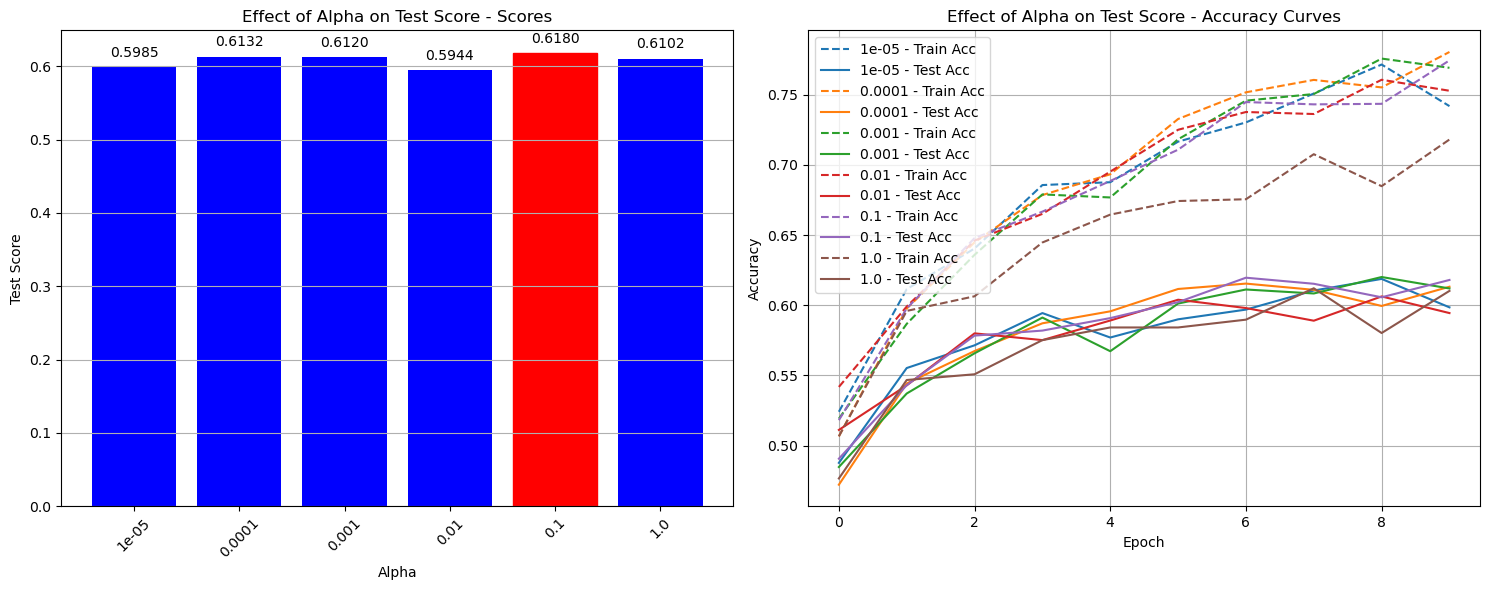

In [9]:
# hyperparameter 3: Tune alpha (using best hidden_layer_sizes)
alpha_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
alpha_scores = []


# Use the function for alpha
alpha_values, alpha_scores, best_alpha, current_params, training_values, testing_values, loss_values = model.tune_hyperparameter(alpha_values, 'alpha', current_params)

# Call the function to plot the bar chart and accuracy curves
plot_q3_visualization([str(alpha) for alpha in alpha_values], alpha_scores, training_values, testing_values, 
                      "Effect of Alpha on Test Score", 
                      "q3-alpha.png", 
                      xlabel="Alpha", ylabel="Test Score", hyper_name="Alpha")


### `Alpha` Tunning 
This section explores how different values of the regularization parameter `alpha` impact model performance. Regularization controls overfitting by penalizing large weights in the MLPClassifier.[0]

**Test Accuracy Summary**  
The bar chart compares final test accuracy across various alpha values. The best performance was achieved with **Alpha = 0.1**, which reached a test accuracy of **~0.6180**. Extremely low (`1e-5`) and high (`1.0`) values resulted in reduced performance, indicating either under or over regularization.

**Learning Curves**  
The line plot displays training and testing accuracy over 10 epochs. Lower alpha values show fast convergence but can overfit. Higher values regularize more aggressively, reducing variance but also slowing learning. **Alpha = 0.1** maintained a good balance between training speed and generalization.

**Conclusion**  
The best performing value was **alpha = 0.1**, which was selected for the final model. These results highlight the importance of alpha in achieving stable, generalizable performance.

Best test accuracy: 0.5447 at epoch 9
learning_rate_init: 1e-05, Test Score: 0.5446913580246914
Best test accuracy: 0.6186 at epoch 9
learning_rate_init: 5e-05, Test Score: 0.618641975308642
Best test accuracy: 0.6409 at epoch 9
learning_rate_init: 0.0001, Test Score: 0.6408641975308642
Best test accuracy: 0.6289 at epoch 9
learning_rate_init: 0.0005, Test Score: 0.6288888888888889
Best test accuracy: 0.6196 at epoch 6
learning_rate_init: 0.001, Test Score: 0.6180246913580247
Best test accuracy: 0.5749 at epoch 7
learning_rate_init: 0.005, Test Score: 0.5682716049382716
Best learning_rate_init: 0.0001


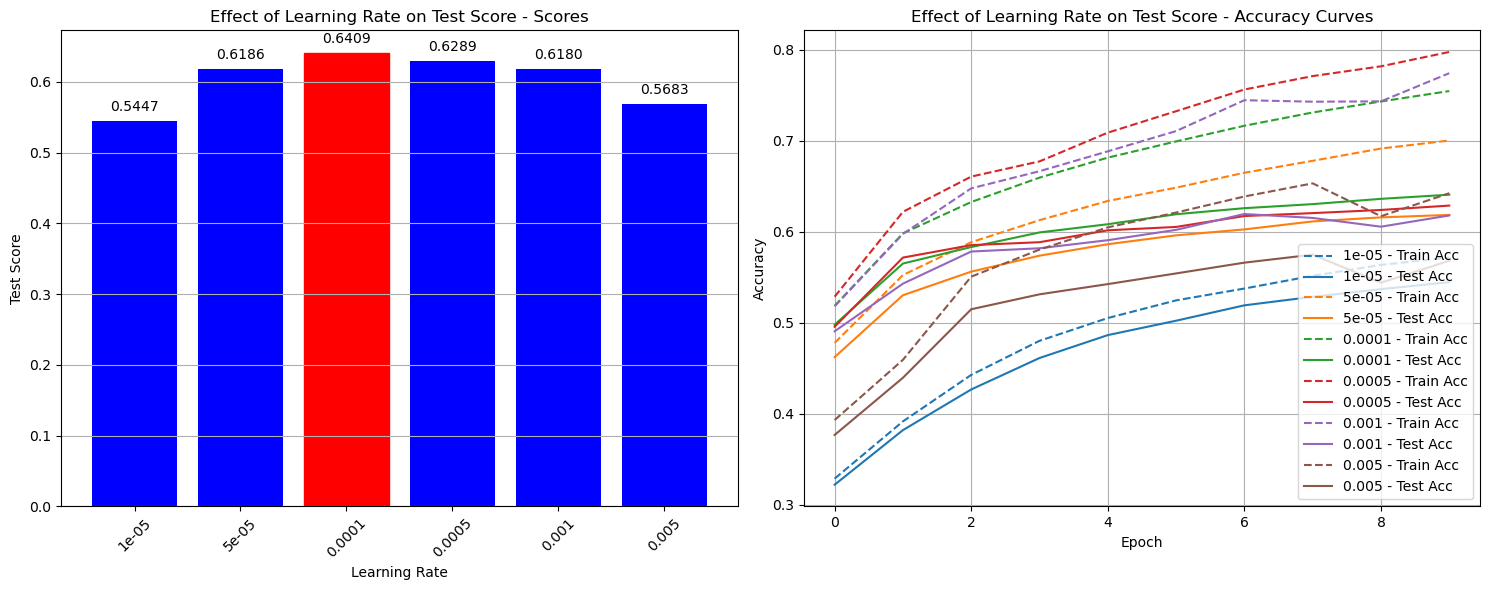

In [10]:

# hyperparameter 4: Tune learning rate (using best hls and alpha)
lr_values = [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005]
lr_scores = []


# Use the function for learning_rate_init
lr_values, lr_scores, best_lr, current_params, training_values, testing_values, loss_values = model.tune_hyperparameter(lr_values, 'learning_rate_init', current_params)

# Call the function to plot the bar chart and accuracy curves
plot_q3_visualization([str(lr) for lr in lr_values], lr_scores, training_values, testing_values, 
                      "Effect of Learning Rate on Test Score", 
                      "q3-lr.png", 
                      xlabel="Learning Rate", ylabel="Test Score", hyper_name="Learning Rate")


### `Learing Rate` Tunning 
This section investigates how different learning rates affect the MLPClassifier’s ability to learn and generalize[0]. Six learning rates were tested from `0.00001` to `0.005`.

**Test Accuracy Summary**  
The bar chart shows test accuracy for each learning rate. The best performance was achieved with **0.0001**, reaching **~0.6409**. Learning rates that were too small (`1e-5`) or too large (`0.005`) underperformed, highlighting the importance of tuning.

**Learning Curve**  
The line plot shows training and test accuracy over 10 epochs. Learning rates in the range `5e-5` to `0.001` provided fast and stable convergence. The lowest rate (`1e-5`) showed slow learning, while `0.005` converged quickly but had lower test accuracy, suggesting possible overfitting or instability.

**Conclusion**  
A learning rate of **0.0001** gave the best trade-off between training speed and generalization, and was chosen for the final model.

Best test accuracy: 0.6311 at epoch 9
batch_size: 32, Test Score: 0.6311111111111111
Best test accuracy: 0.6215 at epoch 9
batch_size: 64, Test Score: 0.6214814814814815
Best test accuracy: 0.6285 at epoch 9
batch_size: 128, Test Score: 0.6285185185185185
Best test accuracy: 0.6331 at epoch 9
batch_size: 256, Test Score: 0.6330864197530864
Best test accuracy: 0.6175 at epoch 9
batch_size: 512, Test Score: 0.6175308641975309
Best test accuracy: 0.6409 at epoch 9
batch_size: auto, Test Score: 0.6408641975308642
Best batch_size: auto


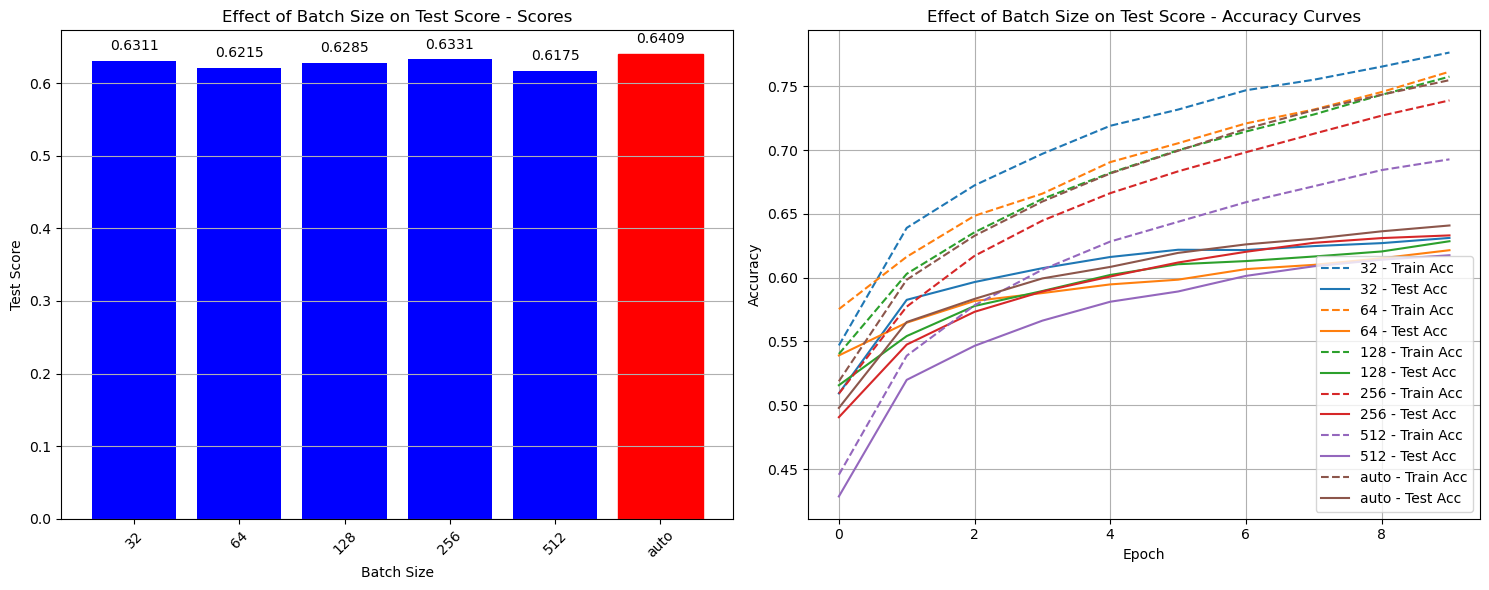

In [11]:
# hyperparameter 5: Tune batch size (using best hls, alpha, and learning rate)
batch_sizes = [32, 64, 128, 256, 512, "auto"]
batch_scores = []


batch_sizes, batch_scores, best_batch, current_params,  training_values, testing_values, loss_values = model.tune_hyperparameter(batch_sizes, 'batch_size', current_params)
# Combine the bar chart and accuracy curves into one visualization
plot_q3_visualization([str(batch) for batch in batch_sizes], batch_scores, training_values, testing_values, 
                      "Effect of Batch Size on Test Score", 
                      "q3-batch.png", 
                      xlabel="Batch Size", ylabel="Test Score", hyper_name="Batch Size")


### `Batch Size` Tunning 
The `batch_size` parameter sets the size of the mini-batches for SGD/Adam; when set to `'auto'`, it uses `min(200, n_samples)`[0], this section examines how varying the batch size affects MLPClassifier performance. Batch sizes tested include powers of 2 from `32` to `512`, as well as `auto`.

**Test Accuracy Summary**  
The bar chart shows that the highest test accuracy was achieved with a batch size of **`auto` (0.641)**, followed closely by `2356` (0.6331) and `256`. Extremely large batch sizes like `512` resulted in lower performance (~0.6175), likely due to reduced gradient updates per epoch.

**Learning Curves**  
The line plot shows accuracy over 10 epochs. Smaller batches (e.g., `32`, `64`) learn faster and reach higher test accuracy early. Larger batches converge more slowly and sometimes underperform. The `auto` setting behaves similarly to mid-range sizes (e.g., `128` or `256`), probably due to the fact it took into accound the large size of the dataset, it was one of the faster training ones as well.

**Conclusion**  
A **`auto` batch size** produced the best generalization and training behavior and was selected for the final model. These results support the idea that smaller batches provide more frequent updates, which helps in escaping local minima.

Early stopping at epoch 77
Best test accuracy: 0.6711 at epoch 47
model parameters: {'hidden_layer_sizes': (300, 150), 'alpha': 0.1, 'learning_rate_init': 0.0001, 'activation': 'relu', 'solver': 'adam'}

final test set score: 0.6618518518518518
Final train set score: 0.9566137566137566


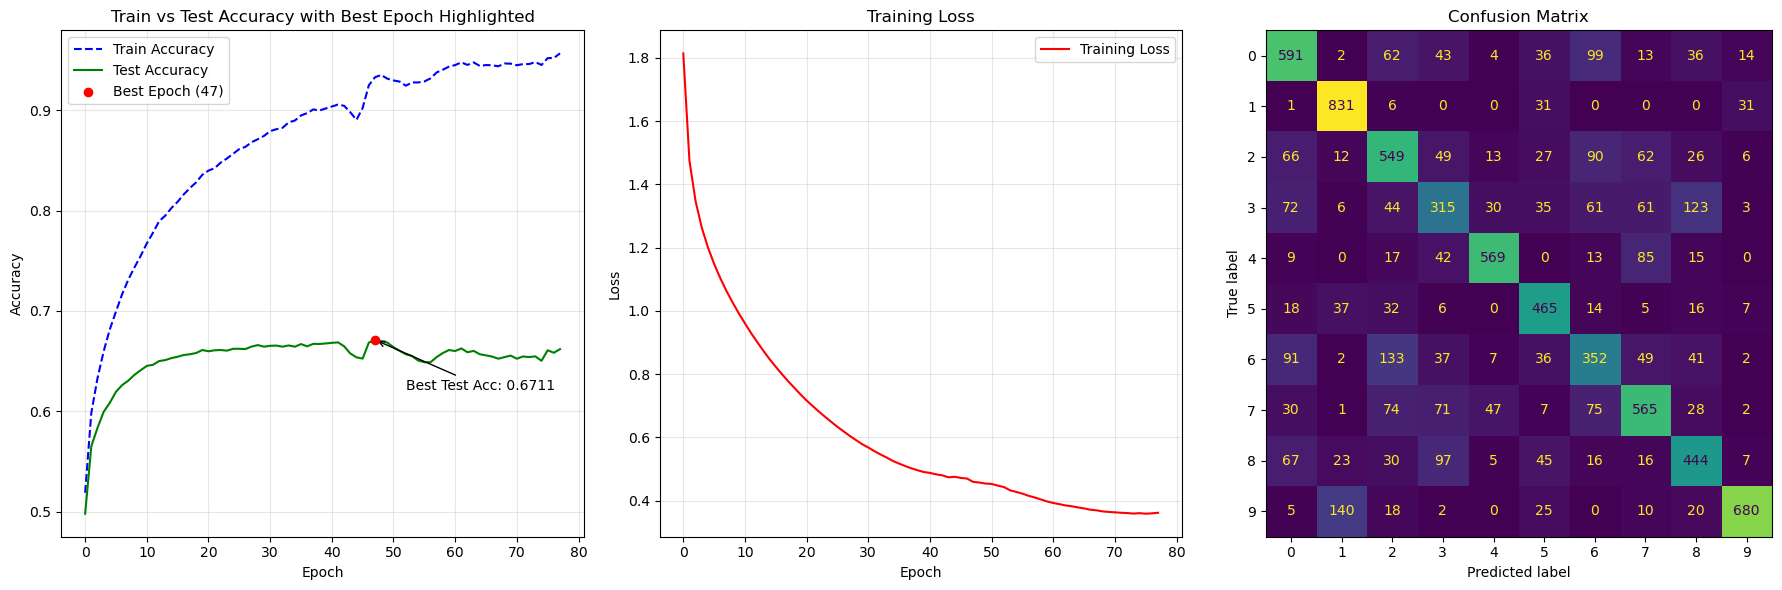

In [ ]:
# define the model initial parameters
current_params = {
    'hidden_layer_sizes': best_hls,  
    'alpha': best_alpha, 
    'learning_rate_init': best_lr,  
    'activation': best_activation,  
    'solver': best_solver,      
}

### 3a ###
# Final optimal_hyperparam:
mlp, loss, train_acc, test_acc = model.q3(test_size=0.3, hyperparam=current_params)

disp = model.confusion_matrix_display

# Combine training and testing accuracy into one graph
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot training and testing accuracy
axes[0].plot(train_acc, label='Train Accuracy', color='blue', linestyle='--')
axes[0].plot(test_acc, label='Test Accuracy', color='green', linestyle='-')

# Highlight the epoch with the best test accuracy
best_epoch = np.argmax(test_acc)
best_test_acc = test_acc[best_epoch]
axes[0].scatter(best_epoch, best_test_acc, color='red', label=f'Best Epoch ({best_epoch})', zorder=5)
axes[0].annotate(f"Best Test Acc: {best_test_acc:.4f}", 
                 xy=(best_epoch, best_test_acc), 
                 xytext=(best_epoch + 5, best_test_acc - 0.05),
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=10)

# Add labels, title, and legend
axes[0].set_title("Train vs Test Accuracy with Best Epoch Highlighted")
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Accuracy")
axes[0].legend()
axes[0].grid(alpha=0.3)

# Plot loss
axes[1].plot(loss, label='Training Loss', color='red')
axes[1].set_title("Training Loss")
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Loss")
axes[1].legend()
axes[1].grid(alpha=0.3)

# Plot confusion matrix
disp.plot(ax=axes[2], cmap='viridis', values_format='d', colorbar=False)
axes[2].set_title("Confusion Matrix")

# Adjust layout and save the combined plot
plt.tight_layout()
plt.savefig("q3-final-combined.png")
plt.show()


### Q3b/c) Final Model Performance Using Best Hyperparameters

Using the optimized hyperparameters: 

- `hidden_layer_sizes`: (300, 150)  
- `alpha`: 0.1  
- `learning_rate_init`: 0.0001  
- `activation`: relu  
- `solver`: adam  
- `batch_size`: auto  

**Learning Dynamics**  
- **Peak test accuracy** of **0.6711** occurred at **epoch 47** (red dot), after which test performance plateaued and slightly declined while training accuracy continued rising (→ 0.957), indicating mild overfitting.  
- **Training loss** fell smoothly from ~1.8 to ~0.36, confirming stable convergence.

**Final Scores**  
- **Test accuracy** (at early stop): 0.6619  
- **Train accuracy**: 0.9566  

**Confusion Matrix Insights**  
- The diagonal is dominant, showing most classes are correctly predicted.  
- Notable confusions occur between classes 2=0 and 3=8, suggesting these land-use types share visual similarities.  
- Class 9 (bottom-right) is especially well separated (680 correct, few misclassifications).

> **Summary:** Early stopping at epoch 77 balanced fit and generalization, yielding a robust model with 67.1% peak test accuracy and clear per-class performance patterns on the confusion matrix.


## Q4 : Impact of Alpha

Training with alpha: 0
Best test accuracy: 0.6573 at epoch 19
Training with alpha: 0.001
Best test accuracy: 0.6579 at epoch 19
Training with alpha: 0.005
Best test accuracy: 0.6590 at epoch 19
Training with alpha: 0.01
Best test accuracy: 0.6584 at epoch 19
Training with alpha: 0.05
Best test accuracy: 0.6556 at epoch 19
Training with alpha: 0.1
Best test accuracy: 0.6610 at epoch 19
Training with alpha: 0.5
Best test accuracy: 0.6600 at epoch 19
Training with alpha: 1
Best test accuracy: 0.6581 at epoch 19
Training with alpha: 2
Best test accuracy: 0.6551 at epoch 19
Training with alpha: 5
Best test accuracy: 0.6359 at epoch 18
Training with alpha: 10
Best test accuracy: 0.6019 at epoch 19
Training with alpha: 50
Early stopping at epoch 17
Best test accuracy: 0.4712 at epoch 2
Training with alpha: 100
Early stopping at epoch 17
Best test accuracy: 0.4183 at epoch 2


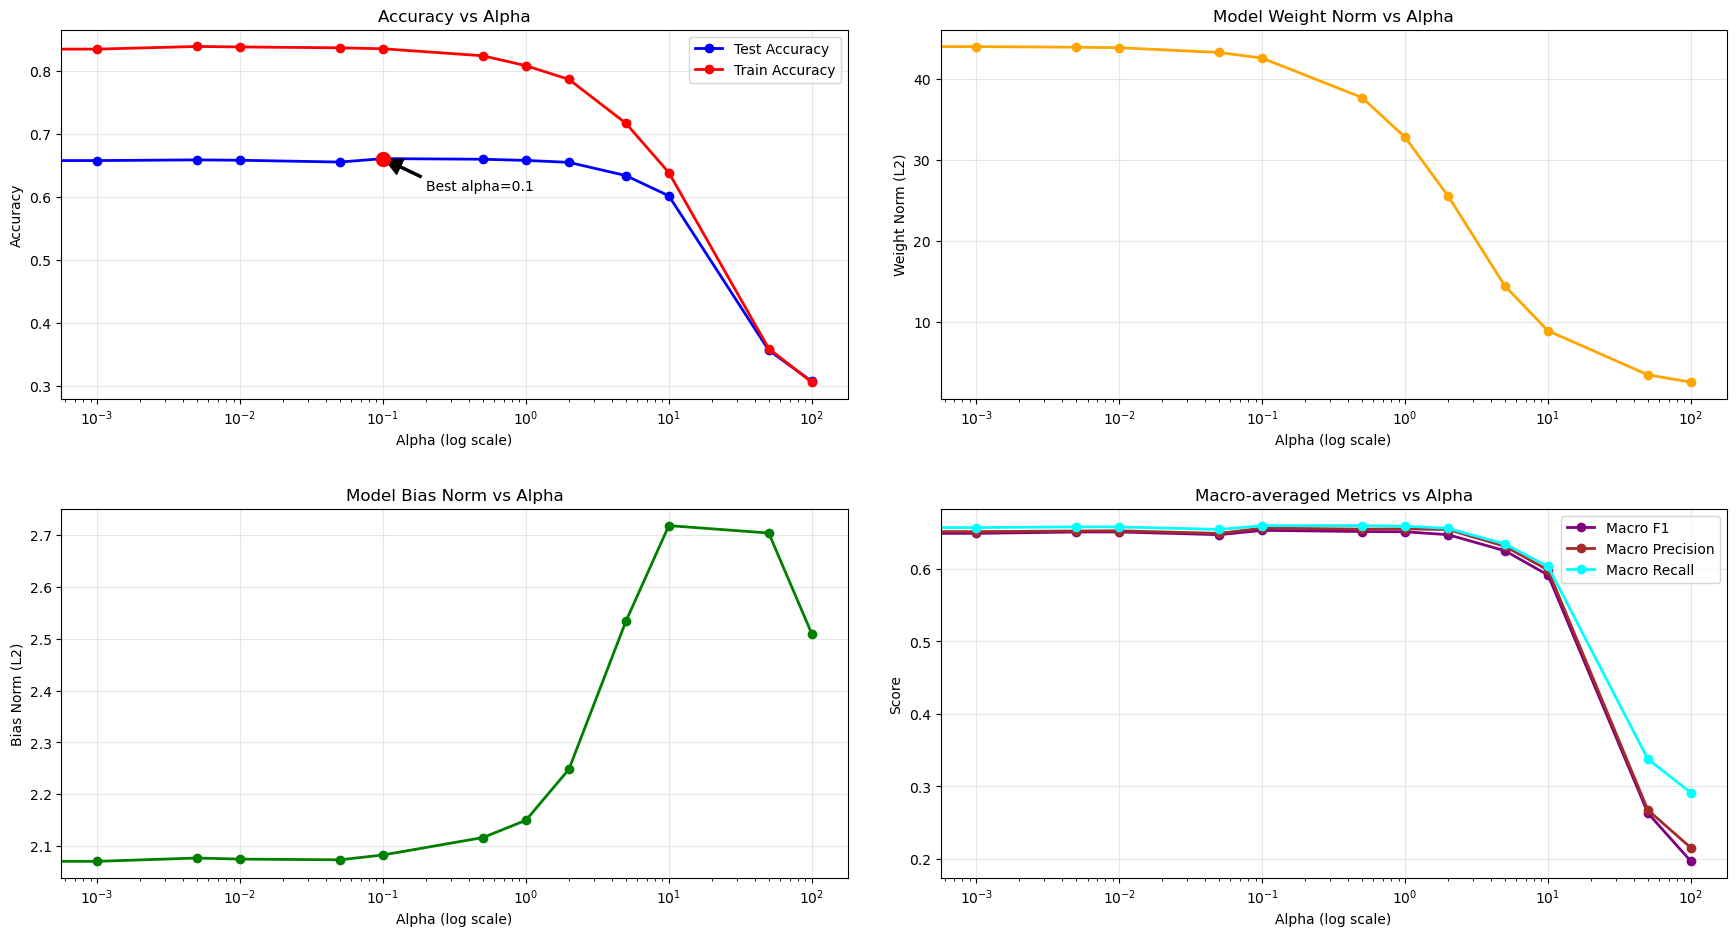

In [ ]:
### 4a ###
results = model.q4()
best_alpha = results['alpha'][np.argmax(results['accuracy'])] # Get the best alpha value based on accuracy

# plot the alpha and the accuracy
plt.figure(figsize=(18, 10))

# First row - Accuracy vs Alpha and Weight Norm vs Alpha
plt.subplot(2, 2, 1)
plt.plot(results['alpha'], results['accuracy'], marker='o', color='blue', linewidth=2, label="Test Accuracy")
plt.plot(results['alpha'], results['train_accuracy'], marker='o', color='red', linewidth=2, label="Train Accuracy")
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Alpha")
plt.legend()
plt.grid(True, alpha=0.3)

# Mark the best alpha value
best_alpha_idx = np.argmax(results['accuracy'])
best_alpha_value = results['alpha'][best_alpha_idx]
best_accuracy = results['accuracy'][best_alpha_idx]

plt.scatter([best_alpha_value], [best_accuracy], color='red', s=100, zorder=5)
plt.annotate(f"Best alpha={best_alpha_value}", 
             xy=(best_alpha_value, best_accuracy),
             xytext=(best_alpha_value * 2, best_accuracy - 0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.subplot(2, 2, 2)
plt.plot(results['alpha'], results['weight_norm'], marker='o', color='orange', linewidth=2)
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Weight Norm (L2)")
plt.title("Model Weight Norm vs Alpha")
plt.grid(True, alpha=0.3)

# Second row - Bias Norm vs Alpha and Macro-averaged Metrics vs Alpha
plt.subplot(2, 2, 3)
plt.plot(results['alpha'], results['bias_norm'], marker='o', color='green', linewidth=2)
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Bias Norm (L2)")
plt.title("Model Bias Norm vs Alpha")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
plt.plot(results['alpha'], results['macro_f1'], marker='o', label='Macro F1', color='purple', linewidth=2)
plt.plot(results['alpha'], results['macro_precision'], marker='o', label='Macro Precision', color='brown', linewidth=2)
plt.plot(results['alpha'], results['macro_recall'], marker='o', label='Macro Recall', color='cyan', linewidth=2)
plt.xscale('log')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Score")
plt.title("Macro-averaged Metrics vs Alpha")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout(pad=3.0)
plt.savefig("q4-1.png", dpi=300, bbox_inches='tight')
plt.show()


### Q4b) Effect of Alpha on MLP Classifier Performance and Parameters

Scikit-learn’s `MLPClassifier` adds an L2‐penalty term scaled by `alpha` to the loss, penalizing large weights and controlling model complexity [0][1]. This section analyzes how different values of the regularization parameter `alpha` impact the model's accuracy, weight magnitudes, and bias magnitudes.

**Plot 1: Accuracy vs Alpha**  
Test accuracy remains stable across small alpha values but **peaks at alpha = 0.1**, where the model achieves its best generalization. Beyond this point, accuracy sharply drops, showing the effect of **over-regularization** — the model becomes too constrained to learn effectively.

**Plot 2: Weight Norm vs Alpha**  
As alpha increases, the **L2 norm of weights** decreases steadily. This is expected, since larger alpha penalizes large weights more strongly. The sharp drop confirms that the model is heavily regularized and forced to shrink its weight parameters.

**Plot 3: Bias Norm vs Alpha**  
Interestingly, the **bias norm increases with alpha** and peaks when weights are suppressed most. This may indicate that when the model cannot rely on large weights to adjust outputs, it compensates by adjusting biases, though the capacity is still reduced overall.

**Plot 4: Macro-averaged Metrics vs. α**  
To assess per-class performance, I compute:  
- **Precision** = TP / (TP + FP), the fraction of predicted positives that are correct [3]
- **Recall** = TP / (TP + FN), the fraction of actual positives detected [4]
- **F1-score** = harmonic mean of precision and recall, balancing false positives and negatives[5] 

TP = True positive,
FP = False Negative,
FN = False Negative,

I use **macro-averaging** (unweighted mean across classes) so that each class contributes equally []. Macro-F1, precision, and recall track test accuracy: stable (~0.66) for alpha ≤ 0.1, then declining rapidly beyond alpha > 1.  

**Conclusion**  
These plots illustrate the **bias-variance trade-off** introduced by regularization. The best test accuracy is achieved when `alpha = 0.1`, balancing complexity and generalization also consistent with scikit-learn’s guidance to tune `alpha` for balanced complexity and performance[1]. 

## Q5 : CV vs Stratified CV

In [3]:
model.q1()

Loaded 27000 samples, 10 unique classes.
Sample shape: (3072,)



(array([0.]), '')

In [4]:
### 5a ###
# Stratified vs Non-Stratified Cross-Validation
# Run the function
strat_acc, non_strat_acc, pval, conclusion = model.q5()

print("Stratified CV Accuracy:", strat_acc)
print("Non-Stratified CV Accuracy:", non_strat_acc)
print("P-Value:", pval)
print("Conclusion:", conclusion)

Stratified CV Accuracy: 0.6681481481481482
Non-Stratified CV Accuracy: 0.6687037037037037
P-Value: 0.6007259809378576
Conclusion: Splitting method had no effect


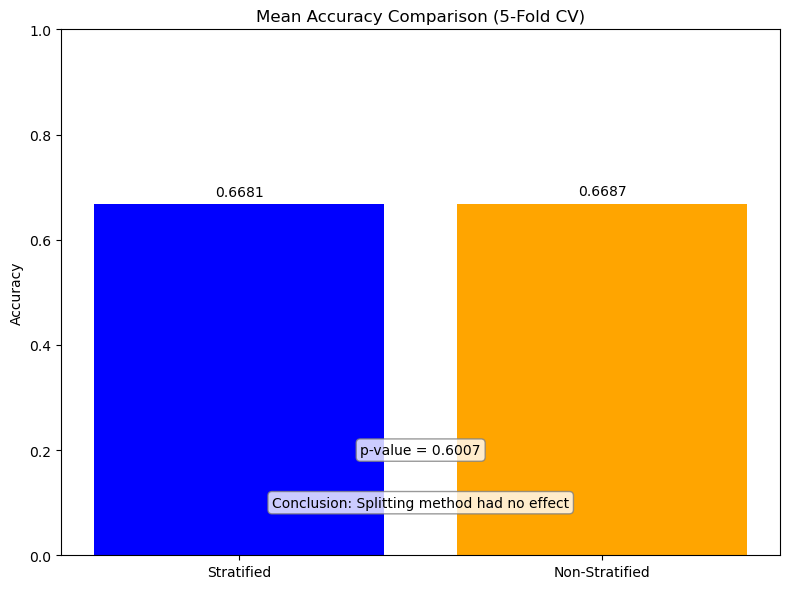

In [5]:
# Create a bar chart for mean accuracy comparison
plt.figure(figsize=(8, 6))
bars = plt.bar(['Stratified', 'Non-Stratified'], [strat_acc, non_strat_acc], color=['blue', 'orange'])
plt.title("Mean Accuracy Comparison (5-Fold CV)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Add accuracy values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

# Add p-value and conclusion as text annotations
plt.annotate(f"p-value = {pval:.4f}", xy=(0.5, 0.2), xycoords='axes fraction',
             ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
plt.annotate(f"Conclusion: {conclusion}", xy=(0.5, 0.1), xycoords='axes fraction',
             ha='center', va='center', bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Show the plot
plt.tight_layout()
plt.savefig("q5-barchart.png", dpi=300)
plt.show()

### 5b) Stratified vs. Non-Stratified CV Impact
This bar chart compares final accuracy from 5-fold cross-validation with and without stratification.  **StratifiedKFold**  [10] (blue - preserves class proportions) slightly underperformed compared to non-stratified CV **KFold**[11] (orange - random splits) using our MLP with optimal hyperparameters, though the difference is very small. The final fold accuracies were:

- **Stratified**: 0.6681  
- **Non-Stratified**: 0.6687  

To test whether the difference is significant, we applied a paired t-test (`scipy.stats.ttest_rel`)[12] on the five fold scores

- **p-value = 0.6007** (> 0.05)

Since **p > 0.05**, therefore **failing to reject** the null hypothesis of equal means, concluding that  
> **“Splitting method had no effect”**  

> **Note:** Because I shuffled before splitting, non-stratified folds already approximate class balance by chance. Without `shuffle=True`, I would expect larger discrepancies and a greater benefit from stratification. But beacuse it is common practice to shuffle datasets like this I Shuffled anyways.

This indicates that, for our dataset and MLP setup, class distribution across folds was not a major factor affecting accuracy.

## Q6 : LLE

In [9]:
# Final plot: all classes
def plot_lle_projection(embedding, y_numeric, classes, class_to_idx, neighbors):
    """
    Plots the LLE projection for all classes and class-wise views.

    Parameters:
    - embedding: The LLE embedding of the dataset (2D array).
    - y_numeric: Numeric labels corresponding to the dataset.
    - classes: List of class labels.
    - class_to_idx: Dictionary mapping class labels to numeric indices.
    - neighbors: The best n_neighbors value used for LLE.
    - output_prefix: Prefix for the output filenames (default: "q6").
    """
    # Final plot: all classes
    plt.figure(figsize=(9, 6))
    scatter = plt.scatter(
        embedding[:, 0], 
        embedding[:, 1], 
        c=y_numeric, 
        cmap='tab10', 
        s=8, 
        alpha=0.7,
        vmin=0,
        vmax=len(classes) - 1 
    )
    plt.title(f"LLE Projection (Best n_neighbors={neighbors})", fontsize=16)
    plt.xlabel("LLE Component 1")
    plt.ylabel("LLE Component 2")
    plt.colorbar(scatter, ticks=range(len(classes)), label="Class")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"q6-{neighbors}-0.png", dpi=300)
    plt.show()
    plt.close()

    # Final plot: separate subplot per class
    fig, axes = plt.subplots(nrows=2, ncols=(len(classes) + 1) // 2, figsize=(15, 8))
    axes = axes.flatten()

    for idx, class_label in enumerate(classes):
        class_idx = class_to_idx[class_label]
        mask = (y_numeric == class_idx)
        ax = axes[idx]
        scatter = ax.scatter(
            embedding[mask, 0],
            embedding[mask, 1],
            c=np.full(np.sum(mask), class_idx),
            cmap='tab10',
            s=10,
            alpha=0.8,
            vmin=0, 
            vmax=len(classes) - 1  
        )
        ax.set_title(f"Class: {class_label}")
        ax.set_xlabel("LLE Component 1")
        ax.set_ylabel("LLE Component 2")
        ax.grid(True, linestyle='--', alpha=0.3)

   
    plt.suptitle(f"LLE Projection (n_neighbors={neighbors}) - Class-wise View", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f"q6-{neighbors}-1.png", dpi=300)
    plt.show()
    plt.close()

In [ ]:
### 6a ###
results = model.q6()


Results of LLE with different n_neighbors:

n_neighbors=10, silhouette score=-0.486


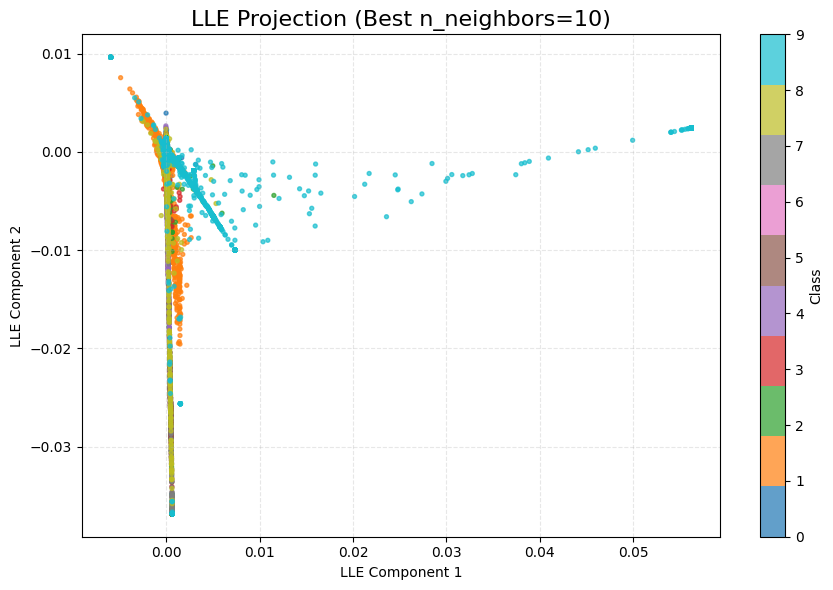

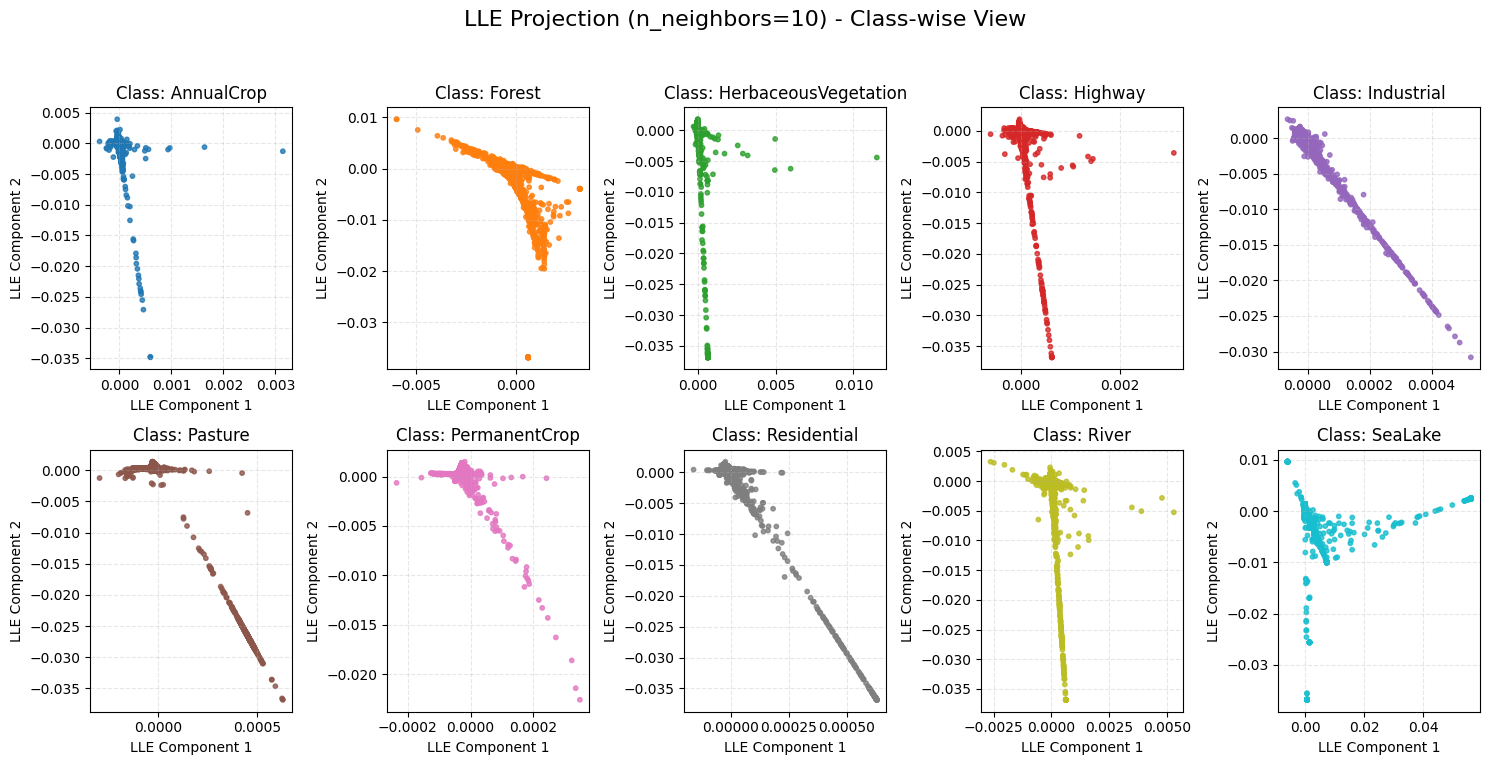

n_neighbors=50, silhouette score=-0.307


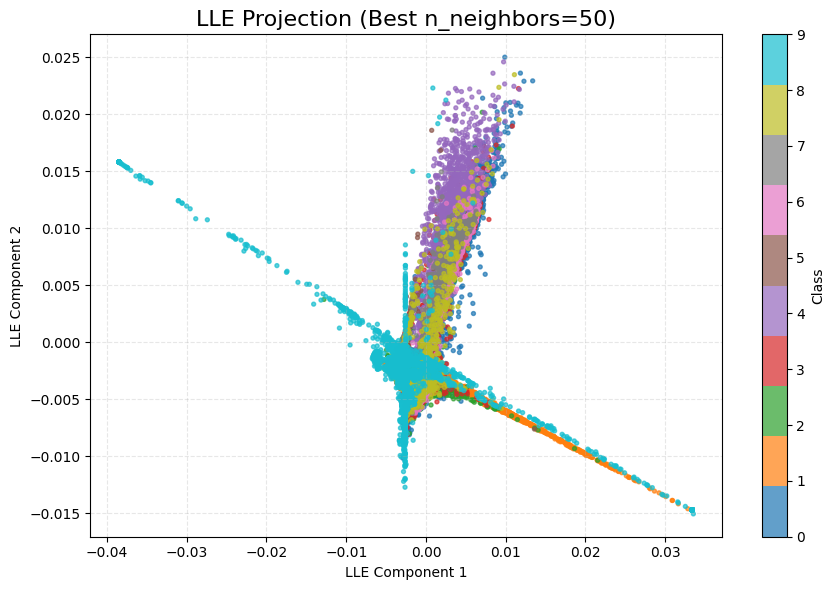

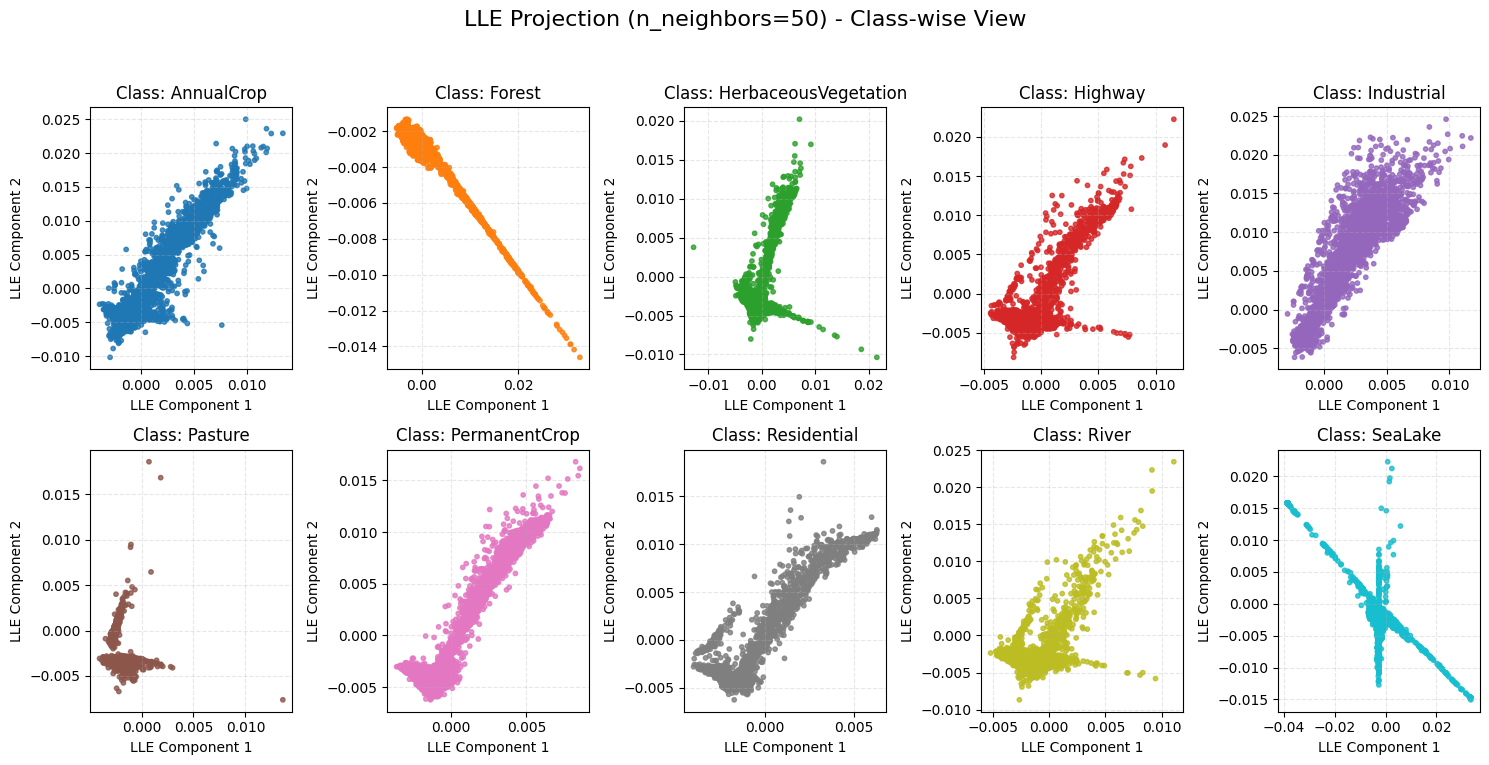

n_neighbors=75, silhouette score=-0.147


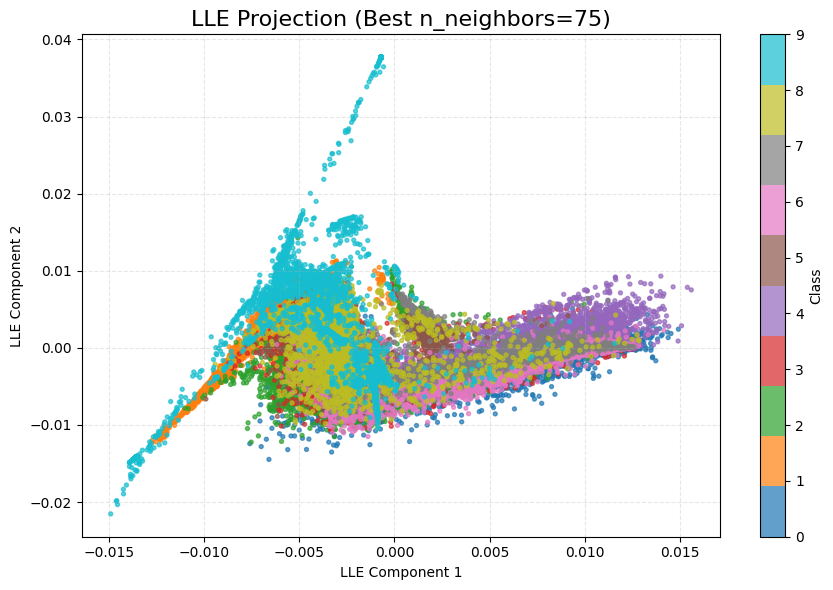

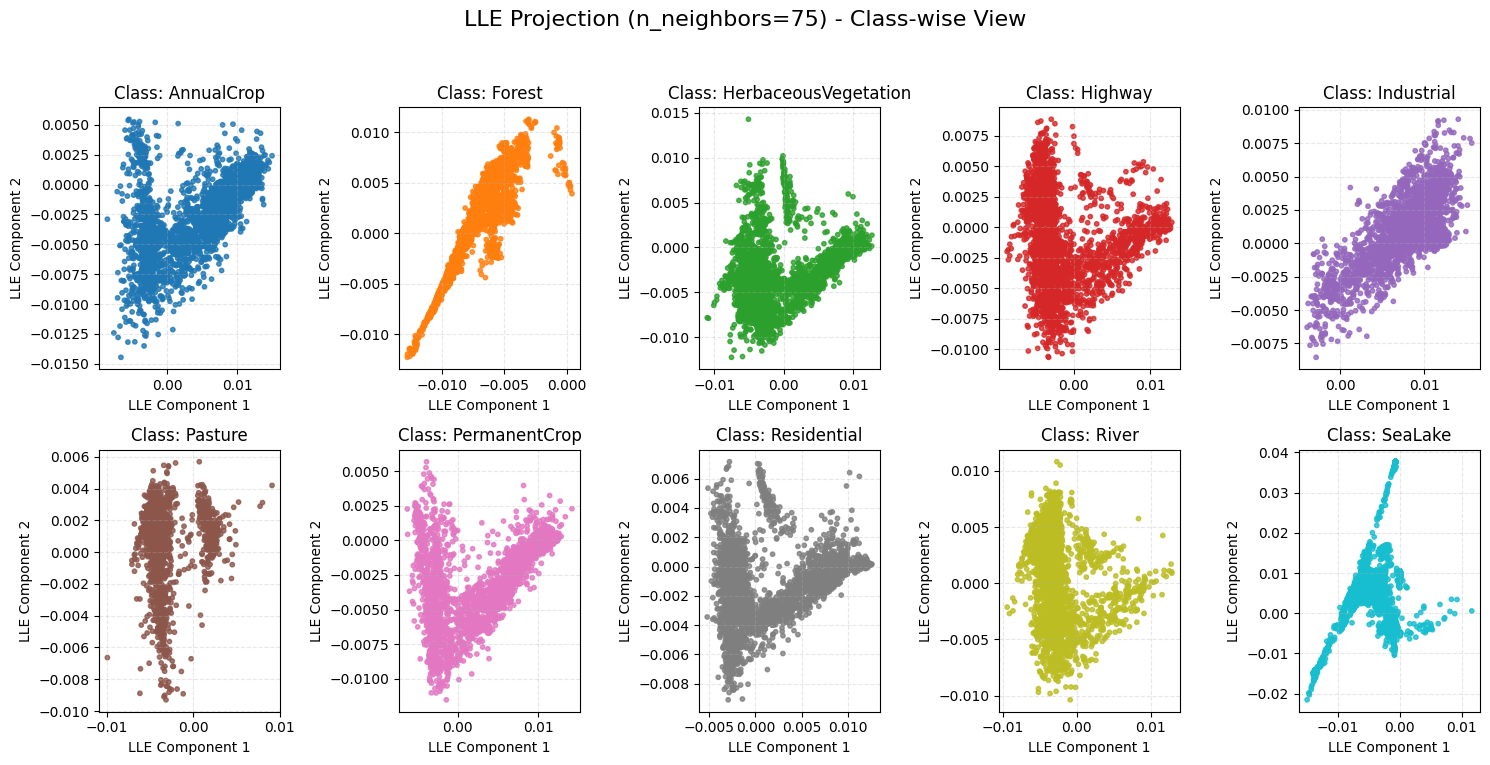

n_neighbors=100, silhouette score=-0.154


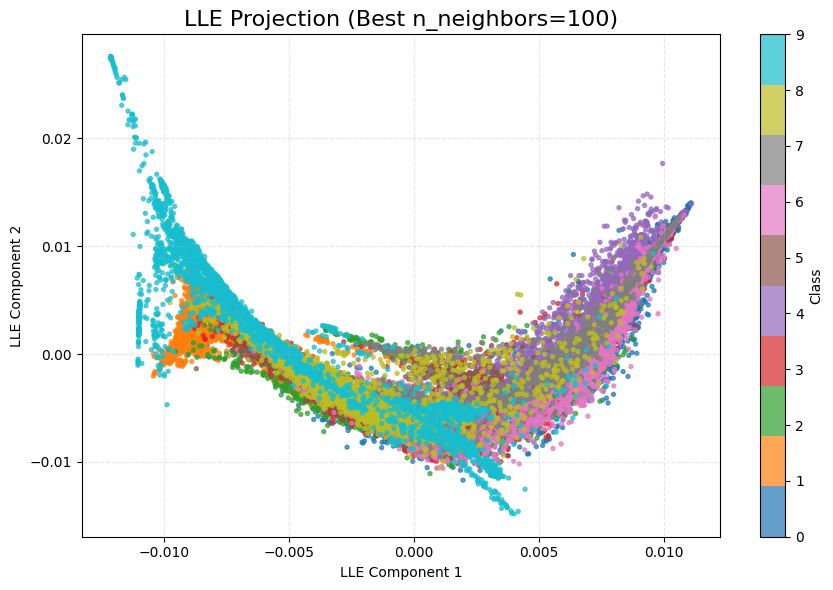

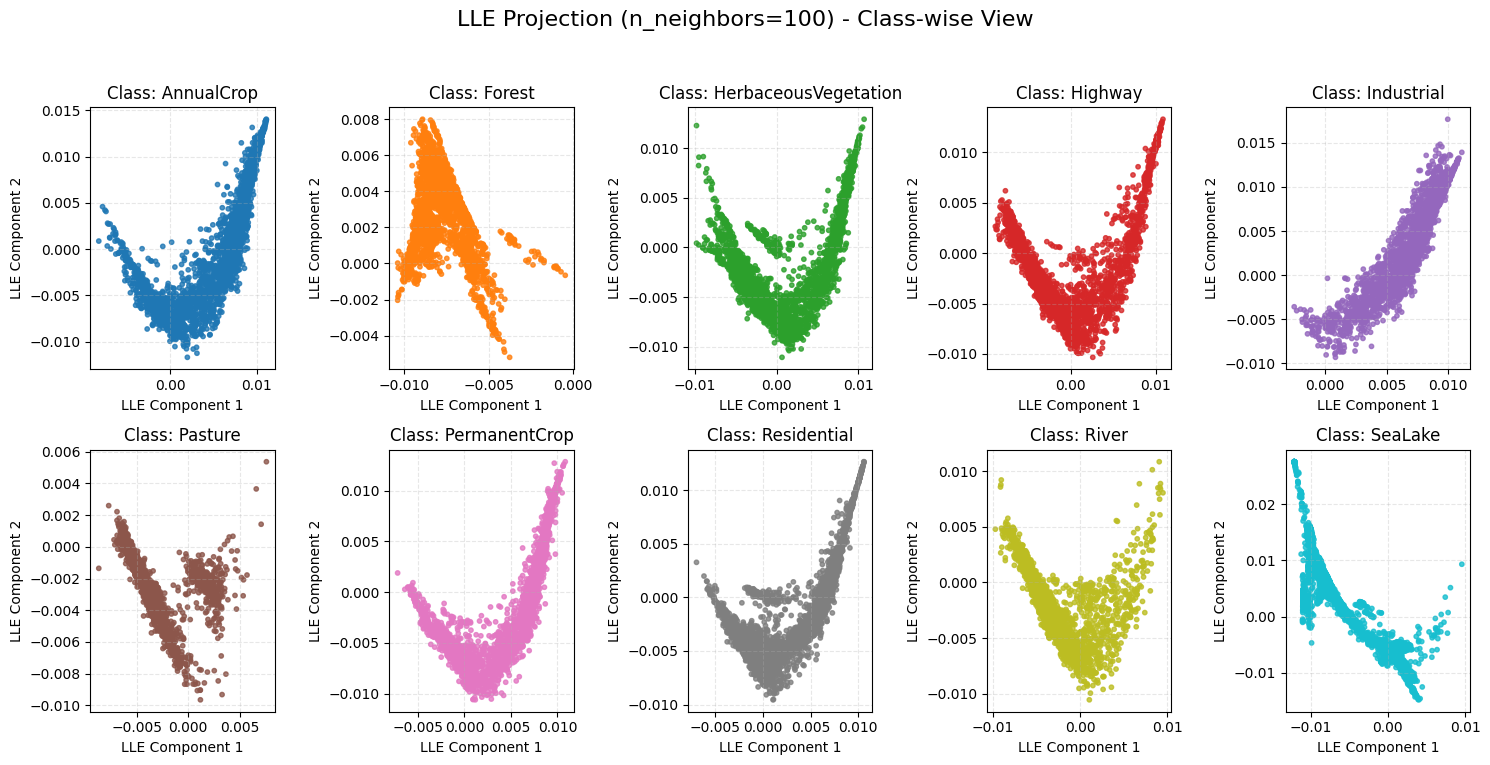

n_neighbors=150, silhouette score=-0.145


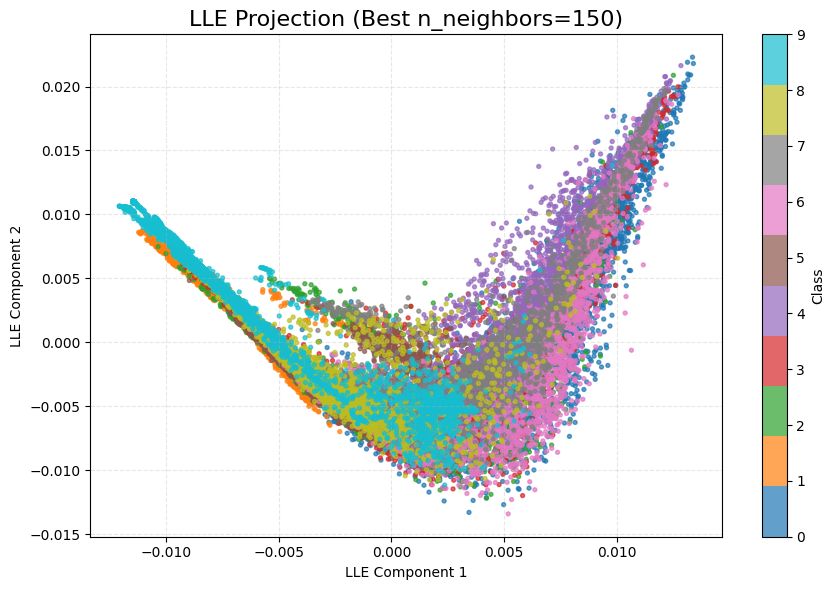

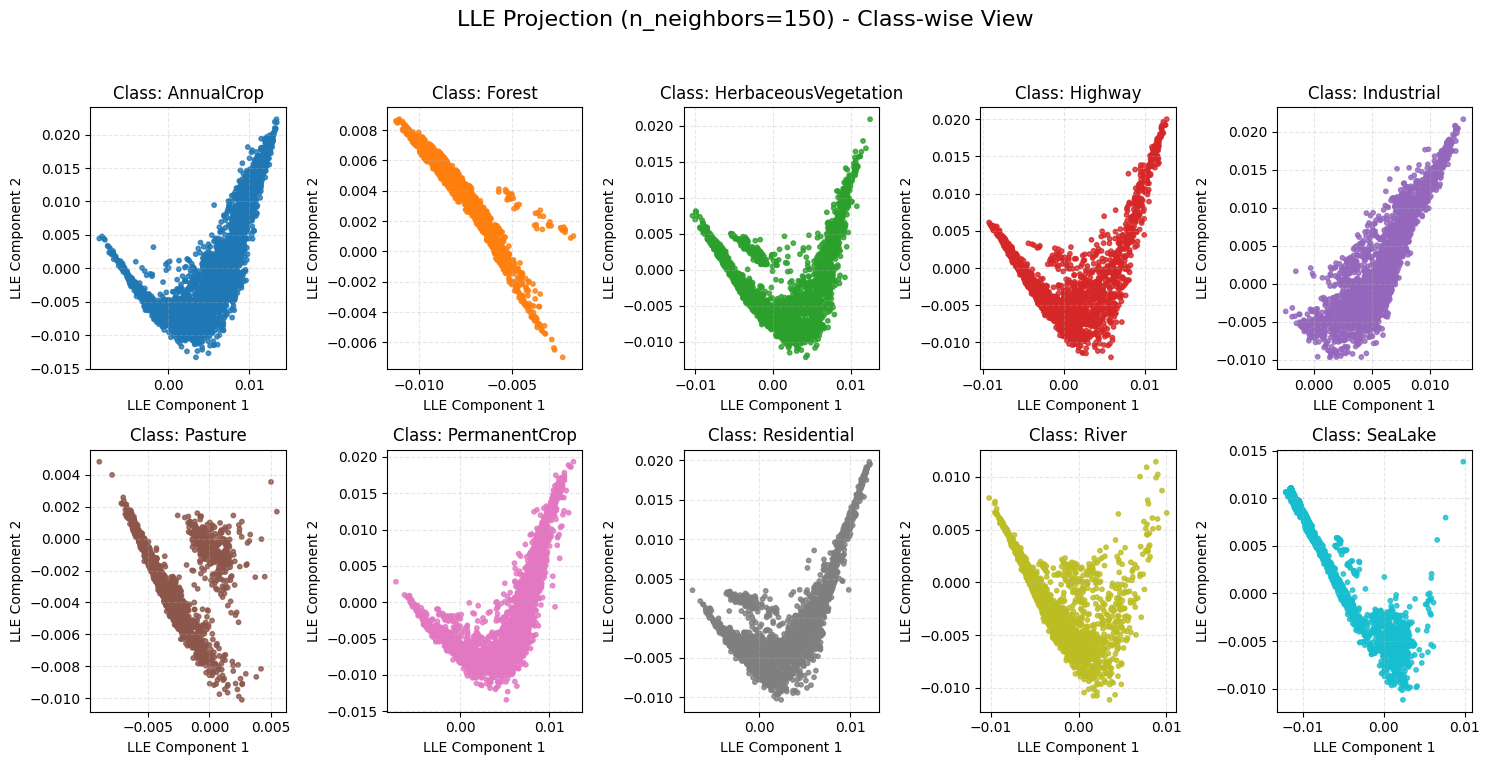

n_neighbors=200, silhouette score=-0.102


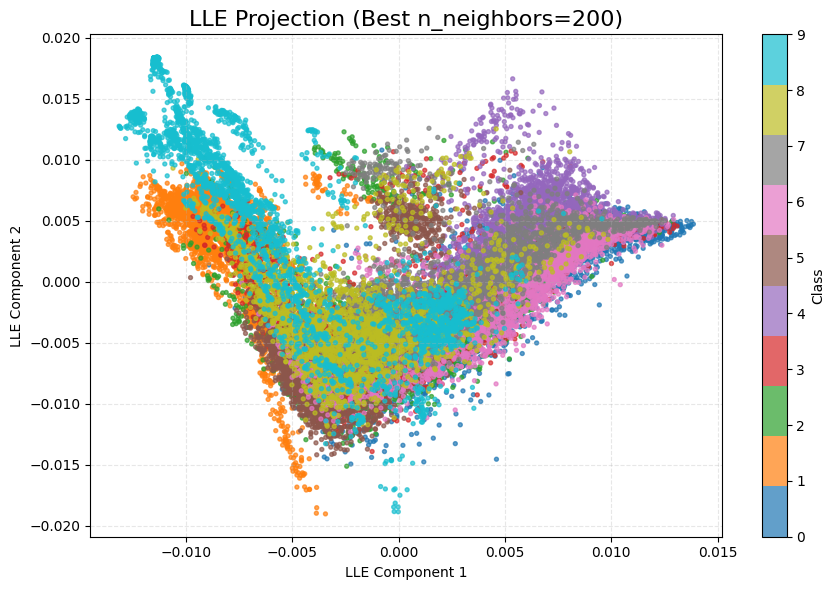

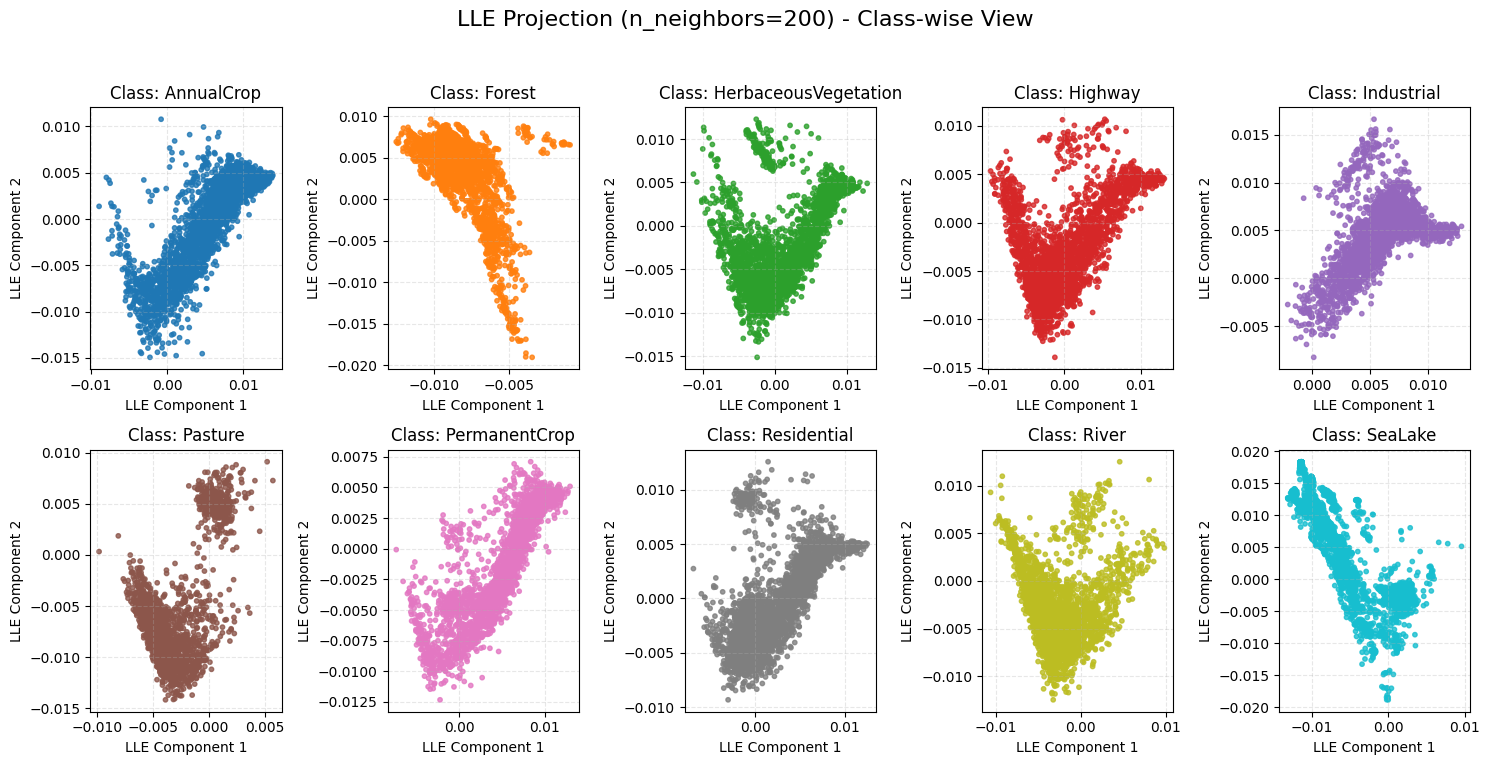


Best n_neighbors = 200 with silhouette score = -0.102


In [8]:
print("\nResults of LLE with different n_neighbors:\n")

# Convert labels to numeric
classes = np.unique(model.y)
class_to_idx = {cls: i for i, cls in enumerate(classes)}
y_numeric = np.array([class_to_idx[label] for label in model.y])


# Plot the LLE projection for all classes and class-wise views
for result in results:
    # Plot all models
    print(f"n_neighbors={result['n_neighbors']}, silhouette score={result['score']:.3f}")
    plot_lle_projection(result["embedding"], y_numeric, classes, class_to_idx, result["n_neighbors"])

# Find best result
best_result = max(results, key=lambda r: r["score"])
best_embedding = best_result["embedding"]
best_neighbors = best_result["n_neighbors"]
best_score = best_result["score"]

print(f"\nBest n_neighbors = {best_neighbors} with silhouette score = {best_score:.3f}")


### 6b) LLE Manifold Embedding and Class Separability
**Locally Linear Embedding (LLE)** is a non-linear dimensionality reduction technique that preserves local neighborhood relationships by reconstructing each point from its \(k\) nearest neighbors, then embedding all points to minimize the overall reconstruction error [7]. Using **Locally Linear Embedding (LLE)** to reduce the `3072-dimensional` image data to `2D`, aiming to visualize class separability, in a two dimentional space and insuring the data was standardized before applying LLE.


**Silhouette Analysis of `n_neighbors`**  
I evaluated the quality of each 2D embedding using the **Silhouette Coefficient**[8], whch is just a measure of how similar an object is to its own cluster compared to other clusters.

Tested `n_neighbors` values of **[10, 50, 75, 100, 150, 200]**. For each, I computed the **silhouette score** to evaluate the quality of the 2D representation. Results show that increasing `n_neighbors` improves the structure and spread of the data, with **200** yielding the best silhouette score.

| n\_neighbors | Silhouette |
| -----------: | ---------: |
|           10 |      -0.486 |
|           50 |      -0.307 |
|           75 |      -0.147 |
|          100 |      -0.154 |
|          150 |      -0.145 |
|          200 |      -0.102 |

Although all scores are negative (reflecting overlapping class clusters), **–0.102 at \(k=200\)** is **the least negative**, i.e. the best cluster separation.

Two final plots were generated using the best result:
- A combined scatter plot showing all classes in 2D.
- A class-wise subplot view, with consistent color mapping, allowing detailed inspection of each class.

**Key findings**
- **Local vs. global trade-off**: Small \(k\) (10–50) preserves very local structure by only looking at tiny local goups, so the overall shape remains bunched up and small; large \(k\) (200) privide a balances in looking at local neighborhood whilst still alloing the dtaa to be more spread out and to see, giving a more interpretable global layout.  
- **Negative Silhouette**: A negative \(S\) indicates points are, on average, closer to neighbors in other classes than to their own; the less negative value at \(k=200\) shows improvement, but still imperfect.  

Overall, LLE effectively uncovered low-dimensional groups(manifolds) in the data. The plots demonstrate meaningful structure and partial class separation.

> **Conclusion:**  Setting `n_neighbors=200` yields the best embedding by Silhouette score (–0.102), revealing meaningful spectral manifolds and partial class separation, consistent with scikit-learn’s LLE guidance[9].  



## Refernces

[0] **MLPClassifier** documentation  
   scikit-learn v1.5.2 — `sklearn.neural_network.MLPClassifier`  
   https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

[1] **Effect of alpha on MLP performance** example  
   scikit-learn v1.5.2 — `plot_mlp_alpha`  
   https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html

[2] **Training curves** example  
   scikit-learn v1.5.2 — `plot_mlp_training_curves`  
   https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_training_curves.html#sphx-glr-auto-examples-neural-networks-plot-mlp-training-curves-py

[3] **Precision, recall, F-score & support**  
   scikit-learn v1.5.2 — `sklearn.metrics.precision_recall_fscore_support`  
   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html

[4] **Recall score** documentation  
   scikit-learn v1.5.2 — `sklearn.metrics.recall_score`  
   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

[5] **F1-score** documentation  
   scikit-learn v1.5.2 — `sklearn.metrics.f1_score`  
   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

[6] **StandardScaler** documentation  
   scikit-learn v1.5.2 — `sklearn.preprocessing.StandardScaler`  
   https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html 

[7] **Manifold learning** overview  
   scikit-learn v1.5.2 — `sklearn.manifold`  
   https://scikit-learn.org/stable/modules/manifold.html

[8] **Silhouette score** documentation  
   scikit-learn v1.5.2 — `sklearn.metrics.silhouette_score`  
   https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

[9] **LocallyLinearEmbedding** documentation  
    scikit-learn v1.5.2 — `sklearn.manifold.LocallyLinearEmbedding`  
    https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html#sklearn.manifold.LocallyLinearEmbedding

[10] **StratifiedKFold** documentation  
    scikit-learn v1.5.2 — `sklearn.model_selection.StratifiedKFold`  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

[11] **KFold** documentation  
    scikit-learn v1.5.2 — `sklearn.model_selection.KFold`  
    https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

[12] **Paired t-test (`ttest_rel`)** documentation  
    SciPy v1.9.3 — `scipy.stats.ttest_rel`  
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html


